In [65]:
import os
import pickle as pkl
import sys

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sys.path.append(os.path.join(os.getcwd(), '..', '..', '..'))
from settings import RESULTS_PATH

In [66]:
os.listdir(RESULTS_PATH)

['sigmoid_relu_experiment.pkl',
 'initialization_plain_xavier_experiment.pkl',
 'batch_size_experiment.pkl',
 'layer_size_experiment.pkl']

In [67]:
experiment_path = os.path.join(RESULTS_PATH, 'initialization_plain_xavier_experiment.pkl')

In [68]:
with open(experiment_path, 'rb') as file:
    results = pkl.load(file)

In [69]:
results = [item for sublist in results for item in sublist]

In [70]:
results = pd.DataFrame(results)

In [71]:
results.columns = ['train_loss', 'val_loss', 'test_loss', 'train_accuracy', 'val_accuracy',
                   'test_accuracy', 'repeat', 'initializer', 'epoch']
results.head()

,train_loss,val_loss,test_loss,train_accuracy,val_accuracy,test_accuracy,repeat,initializer,epoch
0,2.484565,2.484597,2.466821,0.06502,0.0678,0.0617,0,plain,0
1,2.415330,2.426838,2.406673,0.09060,0.0875,0.0884,0,xavier,0
2,2.319323,2.319084,2.331558,0.12288,0.1241,0.1228,0,he,0
3,0.666717,0.619545,4.246143,0.83000,0.8545,0.8425,0,plain,1
4,0.540730,0.498822,4.650727,0.86462,0.8790,0.8746,0,xavier,1


In [72]:
results['initializer'].unique()

array(['plain', 'xavier', 'he'], dtype=object)

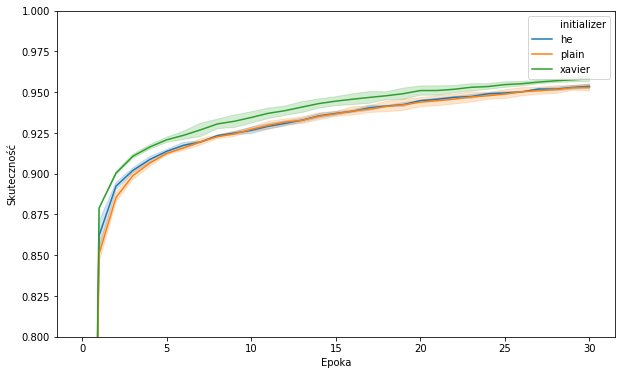

In [75]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
# palette = sns.color_palette("mako_r", results['initializer'].nunique())
sns.lineplot(x='epoch', 
             y='val_accuracy', 
             hue='initializer', 
             hue_order=sorted(results['initializer'].unique()),
             data=results, 
             ax=ax,
             legend="full", ci='sd')
ax.set_ylabel('Skuteczność')
ax.set_xlabel('Epoka')
ax.set_ylim(0.80, 1.0)
plt.show()

## Store results